# Ho = Crime correlates with weather and proximity to ice-cream shops!
# Ha = Crime does not correlate with weather and proximity to ice-cream shops!

# Section 1: Import Libraries

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import gmaps
import scipy.stats as sts
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Section 2: Load Datasets

In [5]:
# Load individual groups

#1. LARCENY-FROM VEHICLE
path = os.path.join('..','Resources','larceny2.csv')
g1w = pd.read_csv(path)
g1w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#2. BURGLARY-RESIDENCE
path = os.path.join('..','Resources','burglary2.csv')
g2w = pd.read_csv(path)
g2w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#3. ROBBERY-PEDESTRIAN
path = os.path.join('..','Resources','robbery2.csv')
g3w = pd.read_csv(path)
g3w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#4. RAPE
path = os.path.join('..','Resources','rape2.csv')
g4w = pd.read_csv(path)
g4w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

#5. HOMICIDE
path = os.path.join('..','Resources','homicide2.csv')
g5w = pd.read_csv(path)
g5w.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1, inplace=True)

In [33]:
# Create Groups for Tests
g1 = g1w['Crime Count']
g2 = g2w['Crime Count']
g3 = g3w['Crime Count']
g4 = g4w['Crime Count']
g5 = g5w['Crime Count']

# Section 3: ANOVA Test for Ice-Cream Correlation

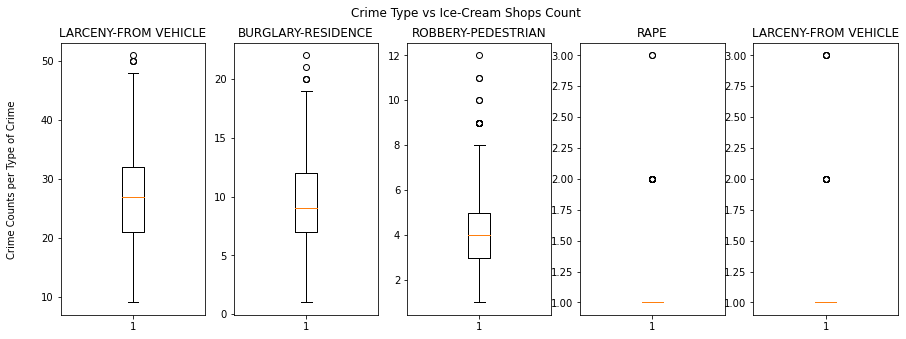

In [34]:
#Bar Plots for Count of Ice-Cream Shops for all Crime Types
fig,ax = plt.subplots(1,5,figsize=(15,5))
fig.suptitle('Crime Type vs Ice-Cream Shops Count')

#1. LARCENY-FROM VEHICLE
ax[0].boxplot(g1)
ax[0].title.set_text('LARCENY-FROM VEHICLE')

#2. BURGLARY-RESIDENCE
ax[1].boxplot(g2)
ax[1].title.set_text('BURGLARY-RESIDENCE')

#3. ROBBERY-PEDESTRIAN
ax[2].boxplot(g3)
ax[2].title.set_text('ROBBERY-PEDESTRIAN')

#4. RAPE
ax[3].boxplot(g4)
ax[3].title.set_text('RAPE')

#5. HOMICIDE
ax[4].boxplot(g5)
ax[4].title.set_text('LARCENY-FROM VEHICLE')

fig.text(0.08, 0.5, 'Crime Counts per Type of Crime', ha='center', va='center', rotation ='vertical')
plt.show()

In [36]:
# Perform the ANOVA
sts.f_oneway(g1, g2, g3, g4,g5)

F_onewayResult(statistic=1486.1521609534068, pvalue=0.0)

# Section 4: Chi Square Test

In [39]:
g1w['Ice Cream Shop'].sum()
df = pd.DataFrame({'Observed':[g1.sum(),g2.sum(),g3.sum(),g4.sum(),g5.sum()]})
df['Expected']=df['Observed'].mean()
df

,Observed,Expected
0,9980,3027.8
1,3409,3027.8
2,1501,3027.8
3,142,3027.8
4,107,3027.8


In [40]:
#Calculate the critical value
critical_value = sts.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [41]:
# Run the chi square test with stats.chisquare()
sts.chisquare(df['Observed'], df['Expected'])

Power_divergenceResult(statistic=22349.042473082765, pvalue=0.0)

# Section5: Conclusions

Since the chi-square value of 22349 at a confidence level of 95% exceeds the critical value of 9.48, we conclude that the differences seen in the number of crime counts per type of crime are statistically significant.